# 予めラベルがわかっているデータは主成分分析で特徴をとらえやすい
ティラミス、タルトタタンなど、クローラーでキーワード指定して収集したレシピ

In [1]:
import pandas as pd
# encoding='ms932'で文字化けを防ぐ ms932はshift-jisのこと
# sep=','で区切り文字を指定 
# skiprows=0でヘッダーを飛ばす 0なら飛ばさない 1なら1行目を飛ばす
csv_input = pd.read_csv('tsukurepo_bow.csv', encoding='ms932', sep=',',skiprows=0)
csv_input

,keyword,title,texture,tsukurepo,クリームチーズ,砂糖,チーズ,マスカルポーネ,ココア,抹茶,...,キャベツ,レンジ,鍋,ポン酢,弁当,フライパン,りんご,甘酒,カラメル,リンゴ
0,ティラミス,ティラミストーストクリチ簡単カフェおやつ,['ほっこり'],父こちら2枚も完食りいCトーストだと言ったらはしゃいで食べたよ私は2枚だけと計算してた父若い...,2,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,ティラミス,いちご抹茶ティラミストースト★おやつパン,[],見えにくいけど右ココア左抹茶だよにき③のすだちモヒートと！父美味いと太り気味だからこれだけに...,1,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
2,ティラミス,ティラミストーストクリチ簡単カフェおやつ,['ほっこり'],父こちら2枚も完食りいCトーストだと言ったらはしゃいで食べたよ私は2枚だけと計算してた父若い...,2,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,ティラミス,いちご抹茶ティラミストースト★おやつパン,[],見えにくいけど右ココア左抹茶だよにき③のすだちモヒートと！父美味いと太り気味だからこれだけに...,1,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
4,ティラミス,ヨーグルトと豆腐の節約ヘルシーティラミス,[],抹茶パウダーで♪底に鈴カステラを、間にビスケットをはさみました。水切りヨーグルトとお豆腐がと...,0,0,0,0,2,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
627,タルトタタン,タルトタタン りんごのケーキ,"['ぎっしり', 'ぐちゃっ']",簡単なのに豪華に見えて、おもてなしにぴったりでした、美味し 美味しく出来ました。自分へﾊﾞｰ...,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
628,タルトタタン,ピンク☆タルトタタン,['サクサク'],次はホールで作ってみたいです！美味しかったです^o^ 簡単にきれいにできました。ありがとうご...,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
629,タルトタタン,タルトタタン,[],生地も林檎も絶妙な美味しさ♪(*´8｀*) リング型しか無く…:: 煮崩れたけどウマー♪ 紅...,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,2
630,タルトタタン,シリコンスチーマーde林檎タルトタタンⅠ,[],簡単子供のおやつになりました★洗い物が少ないのもうれしいです。 リンゴが少なかったのでさつま...,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


# ラベル付けすることが難しいテキスト
例えば、2行目は、タイトルが温泉だが、内容あ出張。5行目は、ホテルという単語が出現しないが、明らかにホテルの話題。一読して何を話題にしているのか、分かりにくいものが多い。

In [5]:
import pandas as pd
csv_input = pd.read_csv('fortravel.csv', encoding='ms932', sep=',',skiprows=0)
csv_input

,title,body,date
0,いいロケーション,日本酒の品揃えが素晴らしいです。特に県外産のもののレベルの高さは秀逸です。料理は凝っているか...,2016-06-01
1,温泉,出張で利用しました。秋田駅からは少しはなれていますが、飲み屋街のそばで飲食店には困らない立地...,2012-02-01
2,上級ビジネスホテルといった感じ,周囲のビジネスホテルに比べ千円以上高いがそれに見合う高級感がある。ロビーに無料で使用できるパ...,2011-08-01
3,手ごろな価格で清潔・安心なホテルです,リッチモンドホテルならではの清潔できれいな客室が、早期予約で手ごろな価格で止まることができま...,2014-04-01
4,駅から近くすぐ分かる,一人旅の素泊まり3700円にて一泊しました。駅から目に入りやすい、すぐ確認できる場所だったの...,2014-03-01
...,...,...,...
4995,これ以上のアトラクションはまずないでしょう！,数年前から参加してみたかったこちらのRIBツアー。今回の夏休みでやっと十和田湖へ行くことがで...,2016-08-01
4996,ビジネスもプライベートにもＯＫ,出張で利用させて頂きました。建物は新しく、部屋もきれいで、ベッドも大きく快適に過ごすことが出...,2014-11-01
4997,秘湯の温泉というよりは温泉プール,●アクセス 県道51号（湯沢栗駒公園線）の三途川渓谷付近から側道に入ります。大きな看板がある...,2009-06-01
4998,シーズンオフ・・・・寒かった。,日本１００名城 岩手・秋田２城巡りの旅２日目ホテルグランド天空→御座石神社→角館武家屋敷通り...,2015-11-01


# とりあえず、fortravel からbowを生成して主成分分析してみる
- 復習(countVectorizerを使った）。####を付けたコーディングの意味を理解すること
- プログラムは、create_bow.pyというファイル。Jupyterではなぜかエラーを吐くので、vs codeで開けてみること


In [6]:
import pandas as pd
csv_input = pd.read_csv('fortravel_bow.csv', encoding='ms932', sep=',',skiprows=0)
csv_input

,title,body,date,あちこち,あまり,ありがたい,いっぱい,うまい,お客,お昼,...,高級,高速,魅力,魚,鳥海山,鶏,鶴,鹿角,麺,黒
0,いいロケーション,日本酒の品揃えが素晴らしいです。特に県外産のもののレベルの高さは秀逸です。料理は凝っているか...,2016-06-01,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,温泉,出張で利用しました。秋田駅からは少しはなれていますが、飲み屋街のそばで飲食店には困らない立地...,2012-02-01,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,上級ビジネスホテルといった感じ,周囲のビジネスホテルに比べ千円以上高いがそれに見合う高級感がある。ロビーに無料で使用できるパ...,2011-08-01,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,手ごろな価格で清潔・安心なホテルです,リッチモンドホテルならではの清潔できれいな客室が、早期予約で手ごろな価格で止まることができま...,2014-04-01,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,駅から近くすぐ分かる,一人旅の素泊まり3700円にて一泊しました。駅から目に入りやすい、すぐ確認できる場所だったの...,2014-03-01,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,これ以上のアトラクションはまずないでしょう！,数年前から参加してみたかったこちらのRIBツアー。今回の夏休みでやっと十和田湖へ行くことがで...,2016-08-01,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4996,ビジネスもプライベートにもＯＫ,出張で利用させて頂きました。建物は新しく、部屋もきれいで、ベッドも大きく快適に過ごすことが出...,2014-11-01,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4997,秘湯の温泉というよりは温泉プール,●アクセス 県道51号（湯沢栗駒公園線）の三途川渓谷付近から側道に入ります。大きな看板がある...,2009-06-01,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4998,シーズンオフ・・・・寒かった。,日本１００名城 岩手・秋田２城巡りの旅２日目ホテルグランド天空→御座石神社→角館武家屋敷通り...,2015-11-01,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### 意味のベクトル方向にデータが散らばっていて、主成分は特徴をとらえているように見えるものの、どの方向にどんなデータが散らばっているのかはわからない。

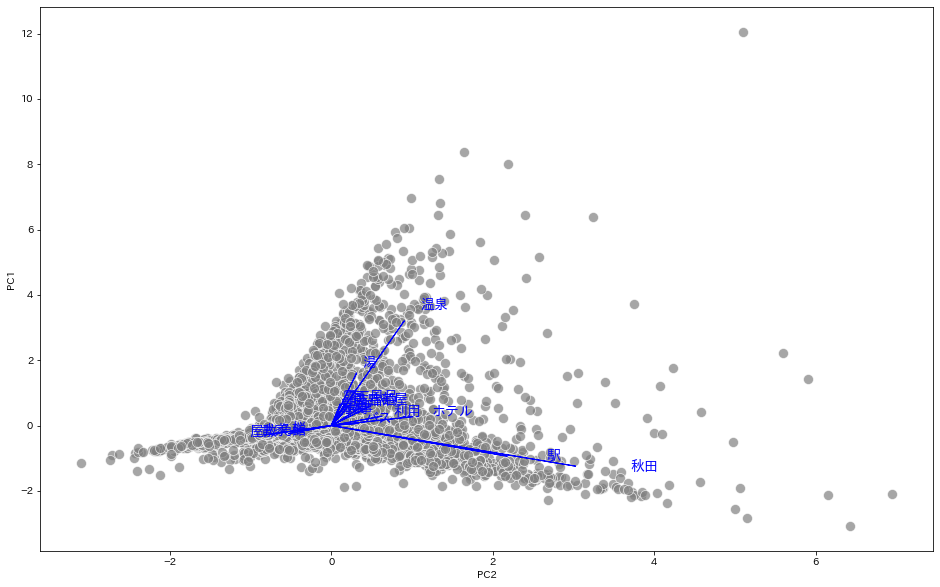

In [3]:
%run pca.py

## クラスタリング
口コミ本文から特徴ラベルを推定して色分けすると、散らばりの意味がわかる



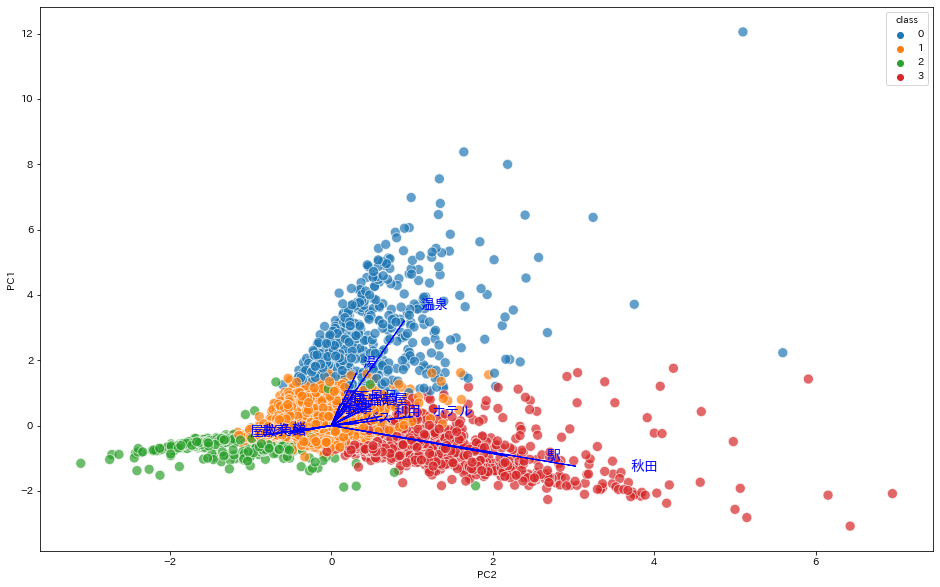

In [4]:
%run pca_clusters.py

# K-means
- 以下のコードの意味を理解しながら、入力して結果を確認せよ。特に重要なポイントはクラスタidの意味を解釈すること

https://analysis-navi.com/?p=2147

1. 演習１.  
クラスタidをもとのデータ(dataframe)の列に追加してください。これでどのようにクラスタリングされたのか意味解釈ができます。
    
2. 演習２．
- 上記の例で、H行までのデータでクラスタリングしてみて、.fit labels_を表示してみてください。
- 次に、I,J行の２つのデータについて、vec.predict(I,Jのデータ）をやってみて、ラベルがどうなっているのかを解釈してみてください。　
3. 演習３．  
上記の例をクラスタ数２にして再度実行せよ。2クラスにした場合、それぞれのクラスはどのような特徴があるのか。説明せよ。

In [4]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import codecs

test_df = pd.read_csv('test_score.csv', index_col=0,encoding='ms932', sep=',')



# K-meansのクラスタをプロットする
#### データ点をクラスタidでアノテーションする  
アノテーションの詳細は以下を参照
http://nekoyukimmm.hatenablog.com/entry/2015/10/08/224607

構文規則
.annotate(アノテーション名,(データの座標))

    算数  国語
A   80  30
B   87  32
C   70  60
D   52  50
E   22  75
F  100  40
G   75  82
H   25  91
I   40  88
J   80  65


/Users/shishishikakou/Downloads/text_mininngⅡ/.venv/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


[0 0 2 2 1 0 2 1 1 2]
    算数  国語  class
A   80  30      0
B   87  32      0
C   70  60      2
D   52  50      2
E   22  75      1
F  100  40      0
G   75  82      2
H   25  91      1
I   40  88      1
J   80  65      2


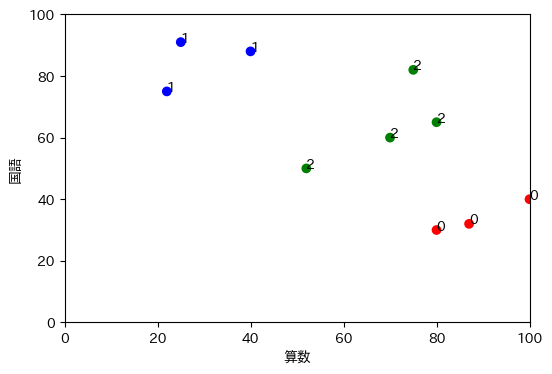

In [7]:
import pandas as pd
from sklearn.cluster import KMeans
import japanize_matplotlib
from matplotlib import pyplot as plt

score_df = pd.read_csv("test_score.csv", encoding='ms932',index_col=0)
print(score_df)
vec = KMeans(n_clusters=3)
pred_vec =vec.fit_predict(score_df)
print(pred_vec)
score_df["class"]=pred_vec
print(score_df)



fig = plt.figure(figsize=(6, 4)) 
ax = fig.add_subplot(1,1,1) 

ax.set_xlim(0,100)
ax.set_ylim(0,100)
ax.set_xlabel('算数')
ax.set_ylabel('国語')
color_codes = {0:"red", 1:"blue", 2:"green"}
colors = [color_codes[x] for x in pred_vec]

X = score_df["算数"]
Y = score_df["国語"]
cluster_id = score_df["class"]
ax.scatter(X,Y,color=colors)#クラスタ毎に色分けしてプロット
 

for i,(x,y,cluster_id) in enumerate(zip(X,Y,cluster_id)):
    ax.annotate(cluster_id,(x,y))# x,y座標にcluster_id をアノテーションする
    
plt.show()

# 演習：k-meansのcentroid(重心)
スライドの説明の通り、k-meansを学習(fit)すると、r_nk(各データがどのクラスタに所属するかのone hotベクトル）を推定すると同時に、各クラスタの中心(μ_k)を内部で計算している。これをセントロイドと呼んでいる。

https://blog.amedama.jp/entry/2017/03/19/160121
を参考にして、上記プログラムを、クラスタ重心（セントロイド）を表示するように修正せよ

    算数  国語
A   80  30
B   87  32
C   70  60
D   52  50
E   22  75
F  100  40
G   75  82
H   25  91
I   40  88
J   80  65
[2 2 1 1 0 2 1 0 0 1]
    算数  国語  class
A   80  30      2
B   87  32      2
C   70  60      1
D   52  50      1
E   22  75      0
F  100  40      2
G   75  82      1
H   25  91      0
I   40  88      0
J   80  65      1


/Users/shishishikakou/Downloads/text_mininngⅡ/.venv/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


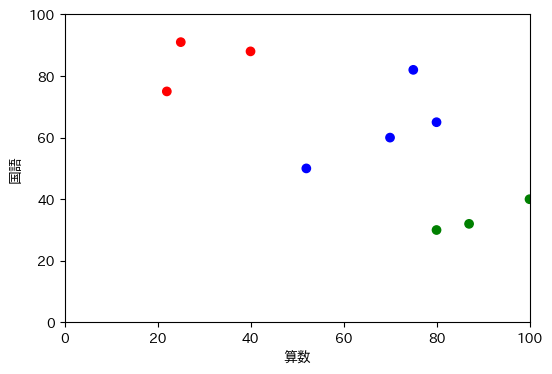

In [8]:
import pandas as pd
from sklearn.cluster import KMeans
import japanize_matplotlib
from matplotlib import pyplot as plt

score_df = pd.read_csv("test_score.csv", encoding='ms932',index_col=0)
print(score_df)
vec = KMeans(n_clusters=3)
pred_vec =vec.fit_predict(score_df)
print(pred_vec)
score_df["class"]=pred_vec
print(score_df)



fig = plt.figure(figsize=(6, 4)) 
ax = fig.add_subplot(1,1,1) 

ax.set_xlim(0,100)
ax.set_ylim(0,100)
ax.set_xlabel('算数')
ax.set_ylabel('国語')
color_codes = {0:"red", 1:"blue", 2:"green"}
colors = [color_codes[x] for x in pred_vec]

X = score_df["算数"]
Y = score_df["国語"]
cluster_ids = score_df["class"]
ax.scatter(X,Y,color=colors)


# クラスタ重心の可視化
- 棒グラフにすると、各クラスタの意味解釈が可能になる
- 以下のソースコードの意味を理解してください。

    算数  国語
A   80  30
B   87  32
C   70  60
D   52  50
E   22  75
F  100  40
G   75  82
H   25  91
I   40  88
J   80  65
[0 0 2 2 1 0 2 1 1 2]
    算数  国語  class
A   80  30      0
B   87  32      0
C   70  60      2
D   52  50      2
E   22  75      1
F  100  40      0
G   75  82      2
H   25  91      1
I   40  88      1
J   80  65      2
[[89.         34.        ]
 [29.         84.66666667]
 [69.25       64.25      ]]
['算数', '国語']


/Users/shishishikakou/Downloads/text_mininngⅡ/.venv/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


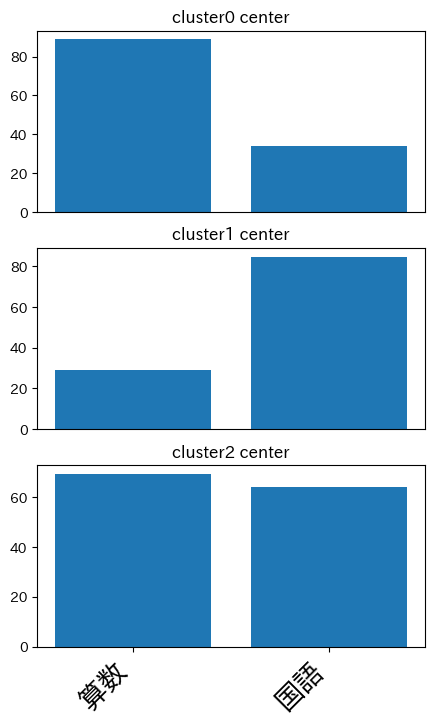

In [9]:
import pandas as pd
from sklearn.cluster import KMeans
import japanize_matplotlib
from matplotlib import pyplot as plt
import matplotlib
import numpy as np
matplotlib.pyplot.rcParams['figure.figsize'] = (5.0, 8.0)
score_df = pd.read_csv("test_score.csv", encoding='ms932',index_col=0)
print(score_df)
vec = KMeans(n_clusters=3)
pred_vec =vec.fit_predict(score_df)
print(pred_vec)
score_df["class"]=pred_vec
print(score_df)
centers = vec.cluster_centers_
print(centers)

headers=score_df.columns.tolist()[:-1]
print(headers)
fig = plt.figure()
x=np.arange(len(headers))

ax1=fig.add_subplot(311,title='cluster0 center')
ax1.bar(x,centers[0])
ax1.axes.xaxis.set_visible(False)#目盛りを消す

ax2=fig.add_subplot(312,title='cluster1 center')
ax2.bar(x,centers[1])
ax2.axes.xaxis.set_visible(False)

ax3=fig.add_subplot(313,title='cluster2 center')
ax3.bar(x,centers[2],tick_label=headers)
ax3.set_xticklabels(headers, rotation=45, ha='right',fontsize=20)

#plt.subplots_adjust(hspace =0.5,bottom=0.2)   
plt.show()

# 演習　fortravel 口コミをk-meansでクラスタリングする
fortravel_bow.csvは、秋田の口コミ5000件を、bowにしたもの。これをもとに、上記のプログラムを使って、以下を求めてください。（以下のコーディングの### ###の中に適切なコードを埋めてください。


1. データセットをクラスタリング
2. クラスタ重心を計算
3. 重心の棒グラフを描画

IndexError: index 3 is out of bounds for axis 0 with size 3

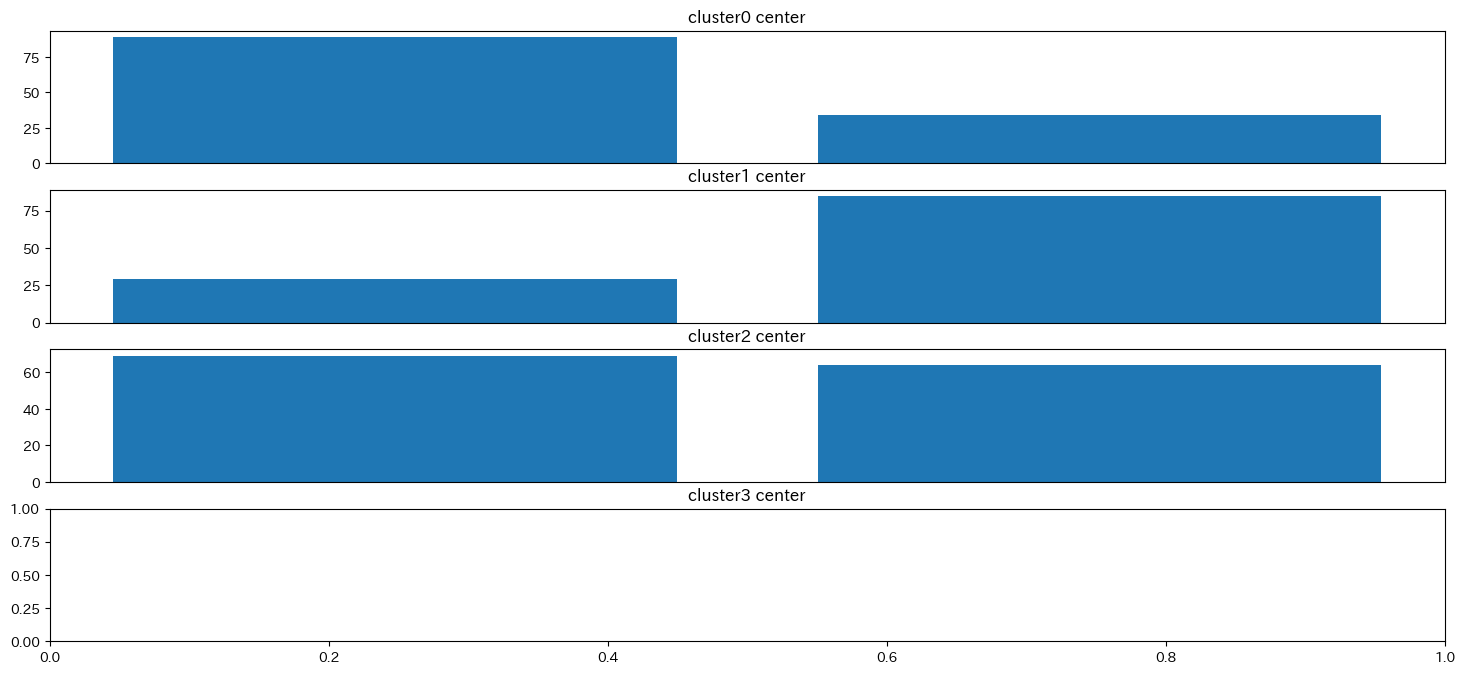

In [10]:
import pandas as pd
from sklearn.cluster import KMeans
import japanize_matplotlib
from matplotlib import pyplot as plt
import matplotlib
import numpy as np
matplotlib.pyplot.rcParams['figure.figsize'] = (18.0, 10.0)
score_df = pd.read_csv("fortravel_bow.csv", encoding='ms932',index_col=0)

####





####

fig = plt.figure()
x=np.arange(len(headers))

ax1=fig.add_subplot(511,title='cluster0 center')
ax1.bar(x,centers[0])
ax1.axes.xaxis.set_visible(False)#目盛りを消す

ax2=fig.add_subplot(512,title='cluster1 center')
ax2.bar(x,centers[1])
ax2.axes.xaxis.set_visible(False)

ax3=fig.add_subplot(513,title='cluster2 center')
ax3.bar(x,centers[2],tick_label=headers)
ax3.axes.xaxis.set_visible(False)

ax4=fig.add_subplot(514,title='cluster3 center')
ax4.bar(x,centers[3],tick_label=headers)
ax4.axes.xaxis.set_visible(False)

ax5=fig.add_subplot(515,title='cluster4 center')
ax5.bar(x,centers[4],tick_label=headers)
ax5.set_xticklabels(headers, rotation=45, ha='right',fontsize=10)

plt.subplots_adjust(hspace =0.5,bottom=0.2)   
plt.show()

# クラスタ重心の要約（トップ２０に並べなおす）
アイデア：辞書型のソートを使う。以下のサンプルプログラムを読んでみてください。辞書型はソートできる。このしかけを利用して各クラスタの重心ベクトルを辞書型にしてベクトルの値の降順ソートして、トップ20を表示する。

辞書型のソート  
https://www.headboost.jp/python-how-to-sort-dict/



In [11]:
import random
a = {}
name = ['bob','charlie','alice','susan','steve']
for n in name:
   val=random.uniform(1,10) 
   a[n]=val

print(a)
a=dict(sorted(a.items(), key=lambda x: x[1],reverse=True))
print(a)

{'bob': 8.766223947920533, 'charlie': 2.8828700323698815, 'alice': 4.428330513723834, 'susan': 1.010668633262127, 'steve': 8.592104373234344}
{'bob': 8.766223947920533, 'steve': 8.592104373234344, 'alice': 4.428330513723834, 'charlie': 2.8828700323698815, 'susan': 1.010668633262127}


### 演習：以下、centers にfortravel のクラスタ重心座標、headersにBoWの見出しが入っている。上記辞書型のソートを応用して、5クラスタそれぞれのトップ20の語彙を表示せよ

以下のようなクラスタがみつかるはず。それ以外は、意味不明なクラスタ
-  武家屋敷
-  温泉
-  ホテル
-  秋田駅関連のクラスタ２つ　これらの違いは明確にはなってない

In [12]:
centers = vec.cluster_centers_ # 2次元配列
headers=score_df.columns.tolist()[3:-1]


In [5]:

center_top20_df = pd.DataFrame(center_top20)
with codecs.open('center_top20.csv')

[('屋敷', 1.6), ('武家', 1.4), ('角館', 1.2), ('桜', 0.7), ('通り', 0.6), ('観光', 0.3), ('場所', 0.2), ('展示', 0.2), ('建物', 0.2), ('時期', 0.2), ('秋田', 0.2), ('蔵', 0.2), ('見学', 0.2), ('館', 0.2), ('駅', 0.2), ('さくら', 0.1), ('カフェ', 0.1), ('ソメイヨシノ', 0.1), ('レストラン', 0.1), ('一番', 0.1)]
[('ホテル', 1.7), ('部屋', 1.0), ('利用', 0.6), ('朝食', 0.5), ('秋田', 0.5), ('駅', 0.5), ('宿泊', 0.4), ('ビジネス', 0.3), ('温泉', 0.3), ('風呂', 0.3), ('食事', 0.3), ('バイキング', 0.2), ('便利', 0.2), ('夕食', 0.2), ('客室', 0.2), ('広く', 0.2), ('快適', 0.2), ('料理', 0.2), ('浴場', 0.2), ('清潔', 0.2)]
[('温泉', 2.7), ('湯', 1.2), ('宿', 0.5), ('露天風呂', 0.5), ('乳頭', 0.4), ('宿泊', 0.4), ('部屋', 0.4), ('風呂', 0.4), ('お湯', 0.3), ('利用', 0.3), ('日帰り', 0.3), ('泉', 0.3), ('入浴', 0.2), ('内湯', 0.2), ('料理', 0.2), ('施設', 0.2), ('旅館', 0.2), ('浴場', 0.2), ('混浴', 0.2), ('温泉郷', 0.2)]
[('秋田', 1.8), ('駅', 1.3), ('利用', 0.2), ('観光', 0.2), ('階', 0.2), ('アクセス', 0.1), ('セット', 0.1), ('バス', 0.1), ('ビル', 0.1), ('ホテル', 0.1), ('ホーム', 0.1), ('メニュー', 0.1), ('ラーメン', 0.1), ('レストラン', 0.1), ('中心', 0.1), 

# cosine類似度にもとづくk-meansクラスタリング
実際は、クラスタ重心（トップ20）はユークリッド距離の場合とほとんどかわらない（データセット依存）


In [13]:
import pandas as pd
import codecs
import matplotlib.pyplot as plt
import numpy as np
import japanize_matplotlib
import matplotlib.pyplot as plt
import codecs
from scipy.spatial.distance import euclidean
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import _kmeans
from sklearn.cluster import KMeans

csv_input = pd.read_csv('fortravel_bow.csv', encoding='ms932', sep=',',skiprows=0)
fortravel_df = csv_input.iloc[:,3:]

fortravel_val = fortravel_df.values
headers = fortravel_df.columns.tolist()

def new_euclidean_distances(X, Y=None, Y_norm_squared=None, squared=False):
	
	return cosine_similarity(X)

_kmeans.euclidean_distances = new_euclidean_distances 
k_means_cosine = _kmeans.KMeans(n_clusters =5,random_state = 0)
k_means_cosine.fit(fortravel_val)
centers = k_means_cosine.cluster_centers_

for c in centers:
   
    c_dic ={name:np.round(val,1) for name,val in zip(headers, c)}
    top_20 = sorted(c_dic.items(), key = lambda x : x[1],reverse=True)[:20]
    
    print(top_20)    

/Users/shishishikakou/Downloads/text_mininngⅡ/.venv/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


[('秋田', 1.7), ('駅', 1.3), ('利用', 0.2), ('観光', 0.2), ('階', 0.2), ('アクセス', 0.1), ('バス', 0.1), ('ビル', 0.1), ('ホテル', 0.1), ('ホーム', 0.1), ('メニュー', 0.1), ('ラーメン', 0.1), ('レストラン', 0.1), ('中心', 0.1), ('久保田', 0.1), ('佐竹', 0.1), ('便利', 0.1), ('側', 0.1), ('公園', 0.1), ('列車', 0.1)]
[('秋田', 0.2), ('バス', 0.1), ('メニュー', 0.1), ('ラーメン', 0.1), ('レストラン', 0.1), ('像', 0.1), ('公園', 0.1), ('利用', 0.1), ('十和田湖', 0.1), ('味', 0.1), ('土産', 0.1), ('地元', 0.1), ('場所', 0.1), ('多い', 0.1), ('宿泊', 0.1), ('展望', 0.1), ('展示', 0.1), ('山', 0.1), ('建物', 0.1), ('料理', 0.1)]
[('ホテル', 1.7), ('部屋', 0.9), ('利用', 0.6), ('朝食', 0.5), ('秋田', 0.5), ('駅', 0.5), ('宿泊', 0.4), ('ビジネス', 0.3), ('温泉', 0.3), ('風呂', 0.3), ('食事', 0.3), ('バイキング', 0.2), ('バス', 0.2), ('便利', 0.2), ('夕食', 0.2), ('客室', 0.2), ('広く', 0.2), ('快適', 0.2), ('料理', 0.2), ('浴場', 0.2)]
[('屋敷', 1.6), ('武家', 1.4), ('角館', 1.2), ('桜', 0.7), ('通り', 0.6), ('観光', 0.3), ('場所', 0.2), ('展示', 0.2), ('建物', 0.2), ('時期', 0.2), ('秋田', 0.2), ('蔵', 0.2), ('見学', 0.2), ('館', 0.2), ('駅', 0.2), ('さくら

# cosine類似度を素手で実装する
数学を実装することがデータサイエンスの真髄。以下のリンクなどを参考にしてn次元ベクトルx,yのcosine類似度を計算するプログラムを書け。  
https://www.sejuku.net/blog/73783#L2%E3%83%8E%E3%83%AB%E3%83%A0

In [16]:
import numpy as np

def cosine_sim (x,y):
    # ドット積を計算
    dot_product = np.dot(x, y)
    
    # xとyのノルム（長さ）を計算
    norm_x = np.linalg.norm(x)
    norm_y = np.linalg.norm(y)
    
    # コサイン類似度を計算
    sim = dot_product / (norm_x * norm_y)
    
   
    return sim

x=np.array([3,4])
y=np.array([4,3])
sim_val = cosine_sim(x,y)

print(sim_val)

0.96


# クラスタリングしたラベルで主成分平面上の点を色分けする
上記のクラスタ重心の要約と意味的に一致したプロットになることがわかる

In [19]:
import seaborn as sns

/Users/shishishikakou/Downloads/text_mininngⅡ/.venv/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


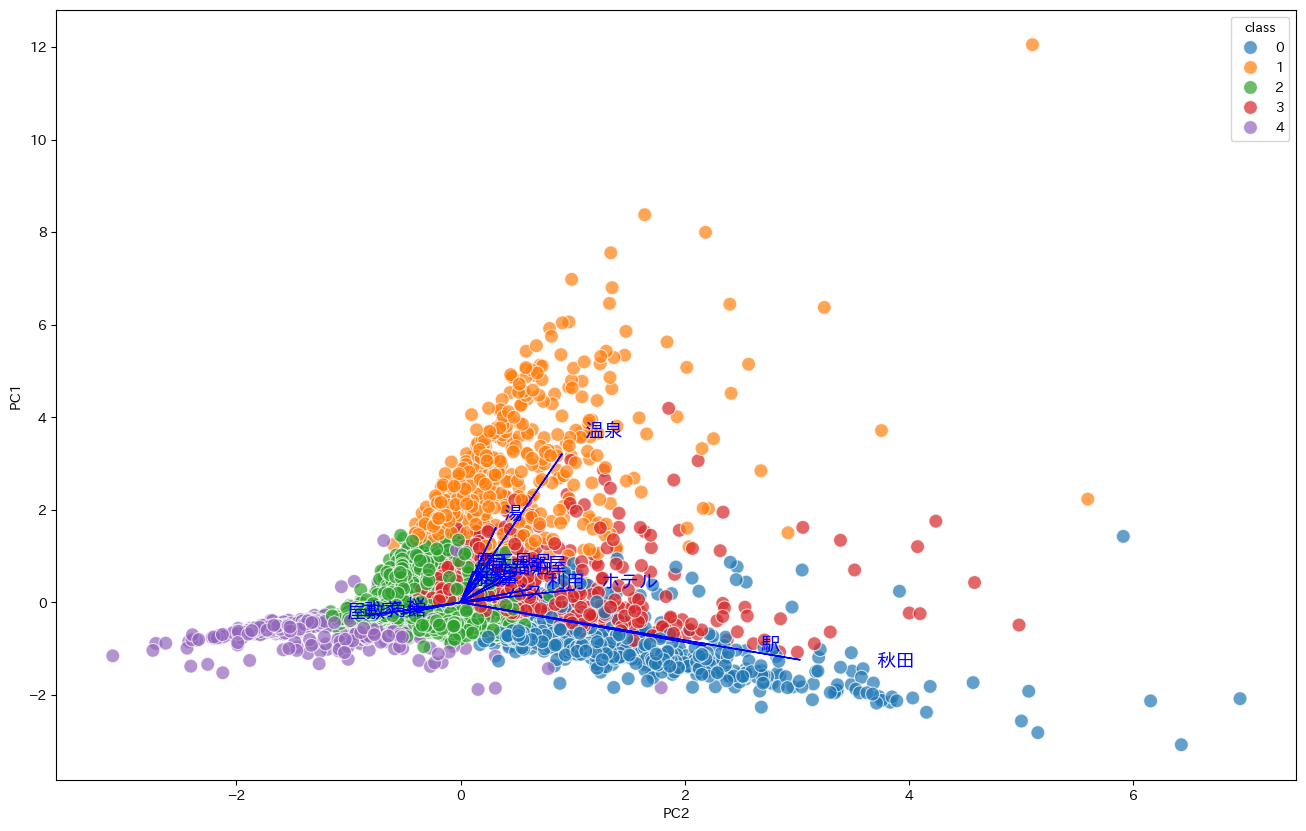

In [20]:
%run pca_clusters_kmeans.py

# 演習：cosine類似度によるk meansクラスタにもとづく主成分平面
cosine類似度によるk-meansを用いて、上記と同様に主成分平面上に色分けプロットを描け。
ほとんど、上図と同じ結果になる。

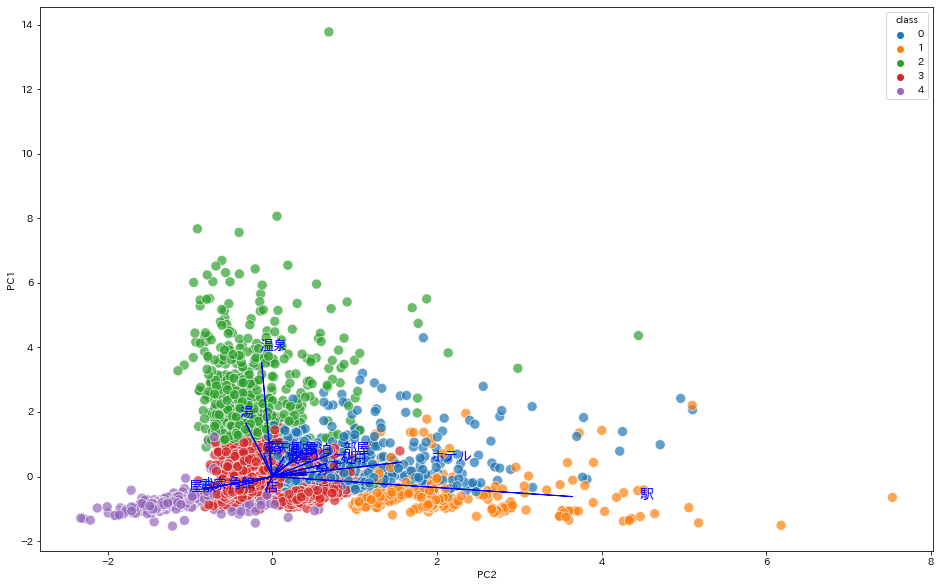